# Reprojections of the AISFMs


This example shows how you can reproject our AI-generated Solar Farside Magnetograms (AISFMs) to the view from different observers.

Here we use [Matplotlib](https://matplotlib.org), [NumPy](https://numpy.org), [Astropy](https://www.astropy.org), and [SunPy](https://sunpy.org) modules.

In [1]:
import matplotlib.pyplot as plt

import numpy as np

from astropy.coordinates import SkyCoord
import astropy.units as u

import sunpy.map

We start with a sample data obtained from the [KDC for SDO](http://sdo.kasi.re.kr/) website.

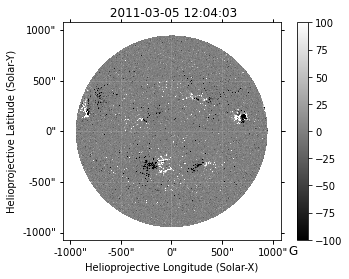

In [2]:
map_aisfm = sunpy.map.Map("./Sample_AISFMs/aisfm_v3_stereo_b_20110305_120403.fits")

map_aisfm.peek(vmax=100, vmin=-100)

Before the reprojection of the AISFM, we replace NaN values with zeros.

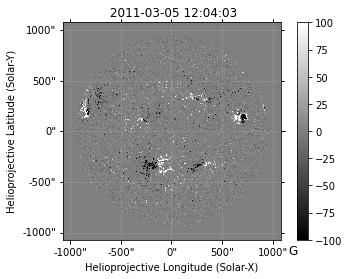

In [3]:
data_aisfm = map_aisfm.data
data_aisfm[np.isnan(data_aisfm)] = 0

map_aisfm = sunpy.map.Map(data_aisfm, map_aisfm.meta)

map_aisfm.peek(vmax=100, vmin=-100)

We can convert the AISFM from a full disk data to a heliographic coordinated map. 

In [4]:
shape_out = (720, 1440)

frame_out = SkyCoord(0, 0, unit=u.deg,
                     frame="heliographic_stonyhurst",
                     rsun = map_aisfm.coordinate_frame.rsun,
                     obstime=map_aisfm.date,
                     observer='earth')

header = sunpy.map.make_fitswcs_header(shape_out,
                                       frame_out,
                                       scale=(360 / shape_out[1],
                                              180 / shape_out[0]) * u.deg / u.pix,
                                       projection_code="CAR")    

outmap = map_aisfm.reproject_to(header)

We can draw the map and the solar limb as seen by an observer at Earth.

 [sunpy.map.mapbase]


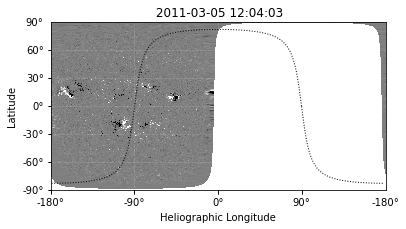

In [5]:
fig = plt.figure()
ax = plt.subplot(projection=outmap)

outmap.plot(ax, vmax=100, vmin=-100)
outmap.draw_limb(color='k', linestyle=':')

plt.show()

Here we pick out an active region around the east limb of the solar frontside.

In [6]:
lonlims_world = [-65, -31]*u.deg
latlims_world = [-5, 23]*u.deg

world_coords = SkyCoord(lon=lonlims_world, lat=latlims_world, 
                        frame=outmap.coordinate_frame)

pixel_coords = outmap.world_to_pixel(world_coords)

xlims_pixel = pixel_coords.x.value
ylims_pixel = pixel_coords.y.value

We plot the zoomed-in magnetogram with large dynamic range values in Gauss.

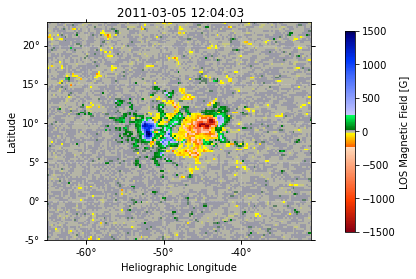

In [7]:
outmap.plot_settings['cmap'] = "hmimag"
outmap.plot_settings['norm'] = plt.Normalize(-1500, 1500)

fig = plt.figure()
ax = plt.subplot(projection=outmap)

im = outmap.plot(ax)

ax.set_xlim(xlims_pixel)
ax.set_ylim(ylims_pixel)

cb = plt.colorbar(im, fraction=0.03, pad=0.1)
cb.set_label(f"LOS Magnetic Field [{map_aisfm.unit}]")

plt.show()


You can try more examples by following the [SunPy Example Gallery](https://docs.sunpy.org/en/stable/generated/gallery/index.html).